<a href="https://colab.research.google.com/github/filipecarbonera/titanic/blob/main/ml_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries.
import numpy as np
import pandas as pd
import seaborn as sns

#Importando o SciKit Learn.
from sklearn.model_selection import train_test_split
from sklearn.metrics  import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

#Modelos de Machine Learning testados.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

seed = 57393

In [2]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/filipecarbonera/titanic/main/dados/train.csv', )
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data = raw_data.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
data = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Survived']]
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


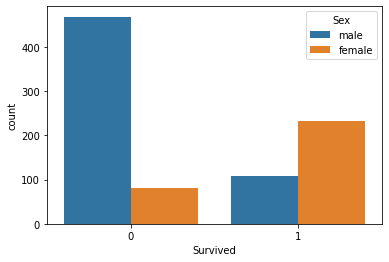

In [6]:
sns.countplot(x='Survived',hue='Sex',data=data)

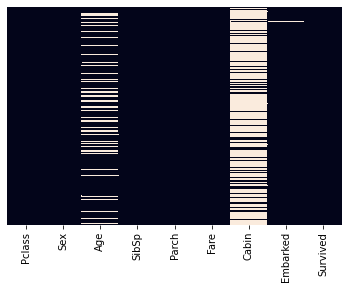

In [7]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

In [8]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


In [9]:
# data['Age'] = data['Age'].fillna(data['Age'].mean())
# data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data = data.dropna()
np.array(data.isnull().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
data.Sex.replace('male', 0, inplace=True)
data.Sex.replace('female', 1, inplace=True)

data.Embarked.replace('S', 0, inplace=True)
data.Embarked.replace('C', 1, inplace=True)
data.Embarked.replace('Q', 2, inplace=True)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
1,1,1,38.0,1,0,71.2833,C85,1,1
3,1,1,35.0,1,0,53.1000,C123,0,1
6,1,0,54.0,0,0,51.8625,E46,0,0
10,3,1,4.0,1,1,16.7000,G6,0,1
11,1,1,58.0,0,0,26.5500,C103,0,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    183 non-null    int64  
 1   Sex       183 non-null    int64  
 2   Age       183 non-null    float64
 3   SibSp     183 non-null    int64  
 4   Parch     183 non-null    int64  
 5   Fare      183 non-null    float64
 6   Cabin     183 non-null    object 
 7   Embarked  183 non-null    int64  
 8   Survived  183 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 14.3+ KB


Text(0.5, 1.0, 'Correlation Heatmap')

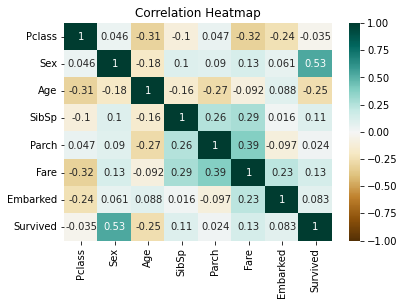

In [12]:
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

LogisticRegression()
auc médio 0.8207291666666666
auc intervalo 0.563848357271009 - 1.0776099760623241
DecisionTreeClassifier()
auc médio 0.728125
auc intervalo 0.45084506417946146 - 1.0054049358205386
KNeighborsClassifier()
auc médio 0.6349363425925926
auc intervalo 0.356591384651788 - 0.9132813005333971
RandomForestClassifier()
auc médio 0.8240798611111113
auc intervalo 0.6075972401086016 - 1.040562482113621


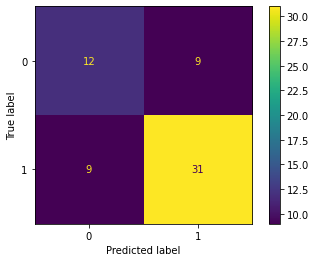

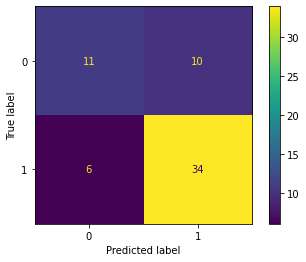

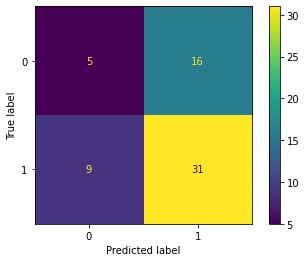

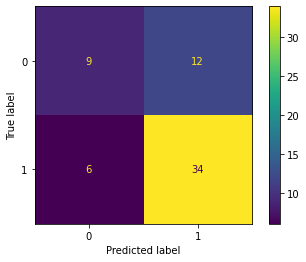

In [13]:
modelos = [LogisticRegression(),
DecisionTreeClassifier(),
KNeighborsClassifier(),
RandomForestClassifier()]

np.random.seed(seed)

y = data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Fare", "Embarked"]
x = data[features]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=seed)

for modelo in modelos:

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    modelo.fit(X_train, y_train)
    resultados = cross_validate(modelo, X_train, y_train, cv=cv, scoring='roc_auc')

    auc_medio = np.mean(resultados['test_score'])
    auc_std = np.std(resultados['test_score'])

    print(modelo)
    print(f'auc médio {auc_medio}')
    print(f'auc intervalo {auc_medio - 2* auc_std} - {auc_medio + 2* auc_std}')

    print(plot_confusion_matrix(modelo, X_test, y_test))